In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [77]:
#import the csv file to work on!!!
df=pd.read_csv('heart_disease_data_set.csv')

In [78]:
#display the first 10 rows in the data frame to know about the data we got!!!
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [79]:
#describe to know more about the data
df[:].describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [80]:
#hence the education is nothing connected to disease so drop the education column!!!
ds=df.drop(['education'],axis=1)
ds.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [81]:
#missing value analysing to clean it
features_nan=[feature for feature in ds.columns if ds[feature].isnull().sum()>1]
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(ds[feature].isnull().mean(),4)))

cigsPerDay: 0.0068% missing values
BPMeds: 0.0125% missing values
totChol: 0.0118% missing values
BMI: 0.0045% missing values
glucose: 0.0916% missing values


In [82]:
nullval = pd.isnull(ds['BPMeds'])
ds[nullval]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
49,1,36,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
77,0,44,1,20.0,NaN,0,0,0,213.0,115.0,72.5,21.16,80.0,89.0,0
193,1,45,1,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.0,1
245,1,46,1,30.0,NaN,0,1,0,253.0,147.0,85.0,30.62,100.0,75.0,0
314,0,39,0,0.0,NaN,0,0,0,242.0,113.0,85.0,25.54,85.0,104.0,0
395,0,65,0,0.0,NaN,0,1,0,270.0,165.0,98.0,21.66,62.0,92.0,1
421,1,44,0,0.0,NaN,0,0,1,190.0,122.0,81.0,36.12,70.0,143.0,0
765,1,50,1,9.0,NaN,0,0,0,296.0,119.0,90.0,23.55,75.0,69.0,1
769,0,37,0,0.0,NaN,0,0,0,145.0,105.0,73.0,23.44,58.0,80.0,0
797,0,59,0,0.0,NaN,0,1,0,240.0,195.0,118.0,23.82,80.0,73.0,0


In [83]:
#Finding the mean value of needed column
cpd_mean = round(ds['cigsPerDay'].mean())
bp_mean = round(ds['BPMeds'].mean())
totchol_mean = round(ds['totChol'].mean())
bmi_mean = round(ds['BMI'].mean())
glucose_mean = round(ds['glucose'].mean())

In [84]:
#Filling the nall value with mean of the respective column
ds['cigsPerDay'].fillna(cpd_mean,inplace=True)
ds['BPMeds'].fillna(bp_mean,inplace=True)
ds['totChol'].fillna(totchol_mean,inplace=True)
ds['BMI'].fillna(bmi_mean,inplace=True)
ds['glucose'].fillna(glucose_mean,inplace=True)

In [85]:
features_nan=[feature for feature in ds.columns if ds[feature].isnull().sum()>1]
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(ds[feature].isnull().mean(),4)))

In [86]:
ds[:].isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [87]:
#Solving that one null value in heartRate 
#findng the index of that one null value
null_df = ds.heartRate.isnull()
j=0
for i in null_df:
    if(i == False):
            j=j+1
    else:
            print(j)
            break   
ds.heartRate[689]

689


nan

In [88]:
#Replaceing that one null value with the mean of heartRate
HR_mean = round(ds['heartRate'].mean())
ds.heartRate[689]= HR_mean
ds.heartRate[689]

C:\Users\user\AppData\Local\Temp\ipykernel_17620\2466464857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.heartRate[689]= HR_mean


76.0

In [89]:
ds.groupby('TenYearCHD').mean()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,0.410684,48.767668,0.489983,8.712577,0.023094,0.003895,0.275737,0.019199,235.193378,130.333612,82.160963,25.673826,75.762382,80.806066
1,0.532609,54.145963,0.517081,10.624224,0.063665,0.017081,0.504658,0.062112,245.271739,143.618789,86.981366,26.523199,76.529503,88.464286


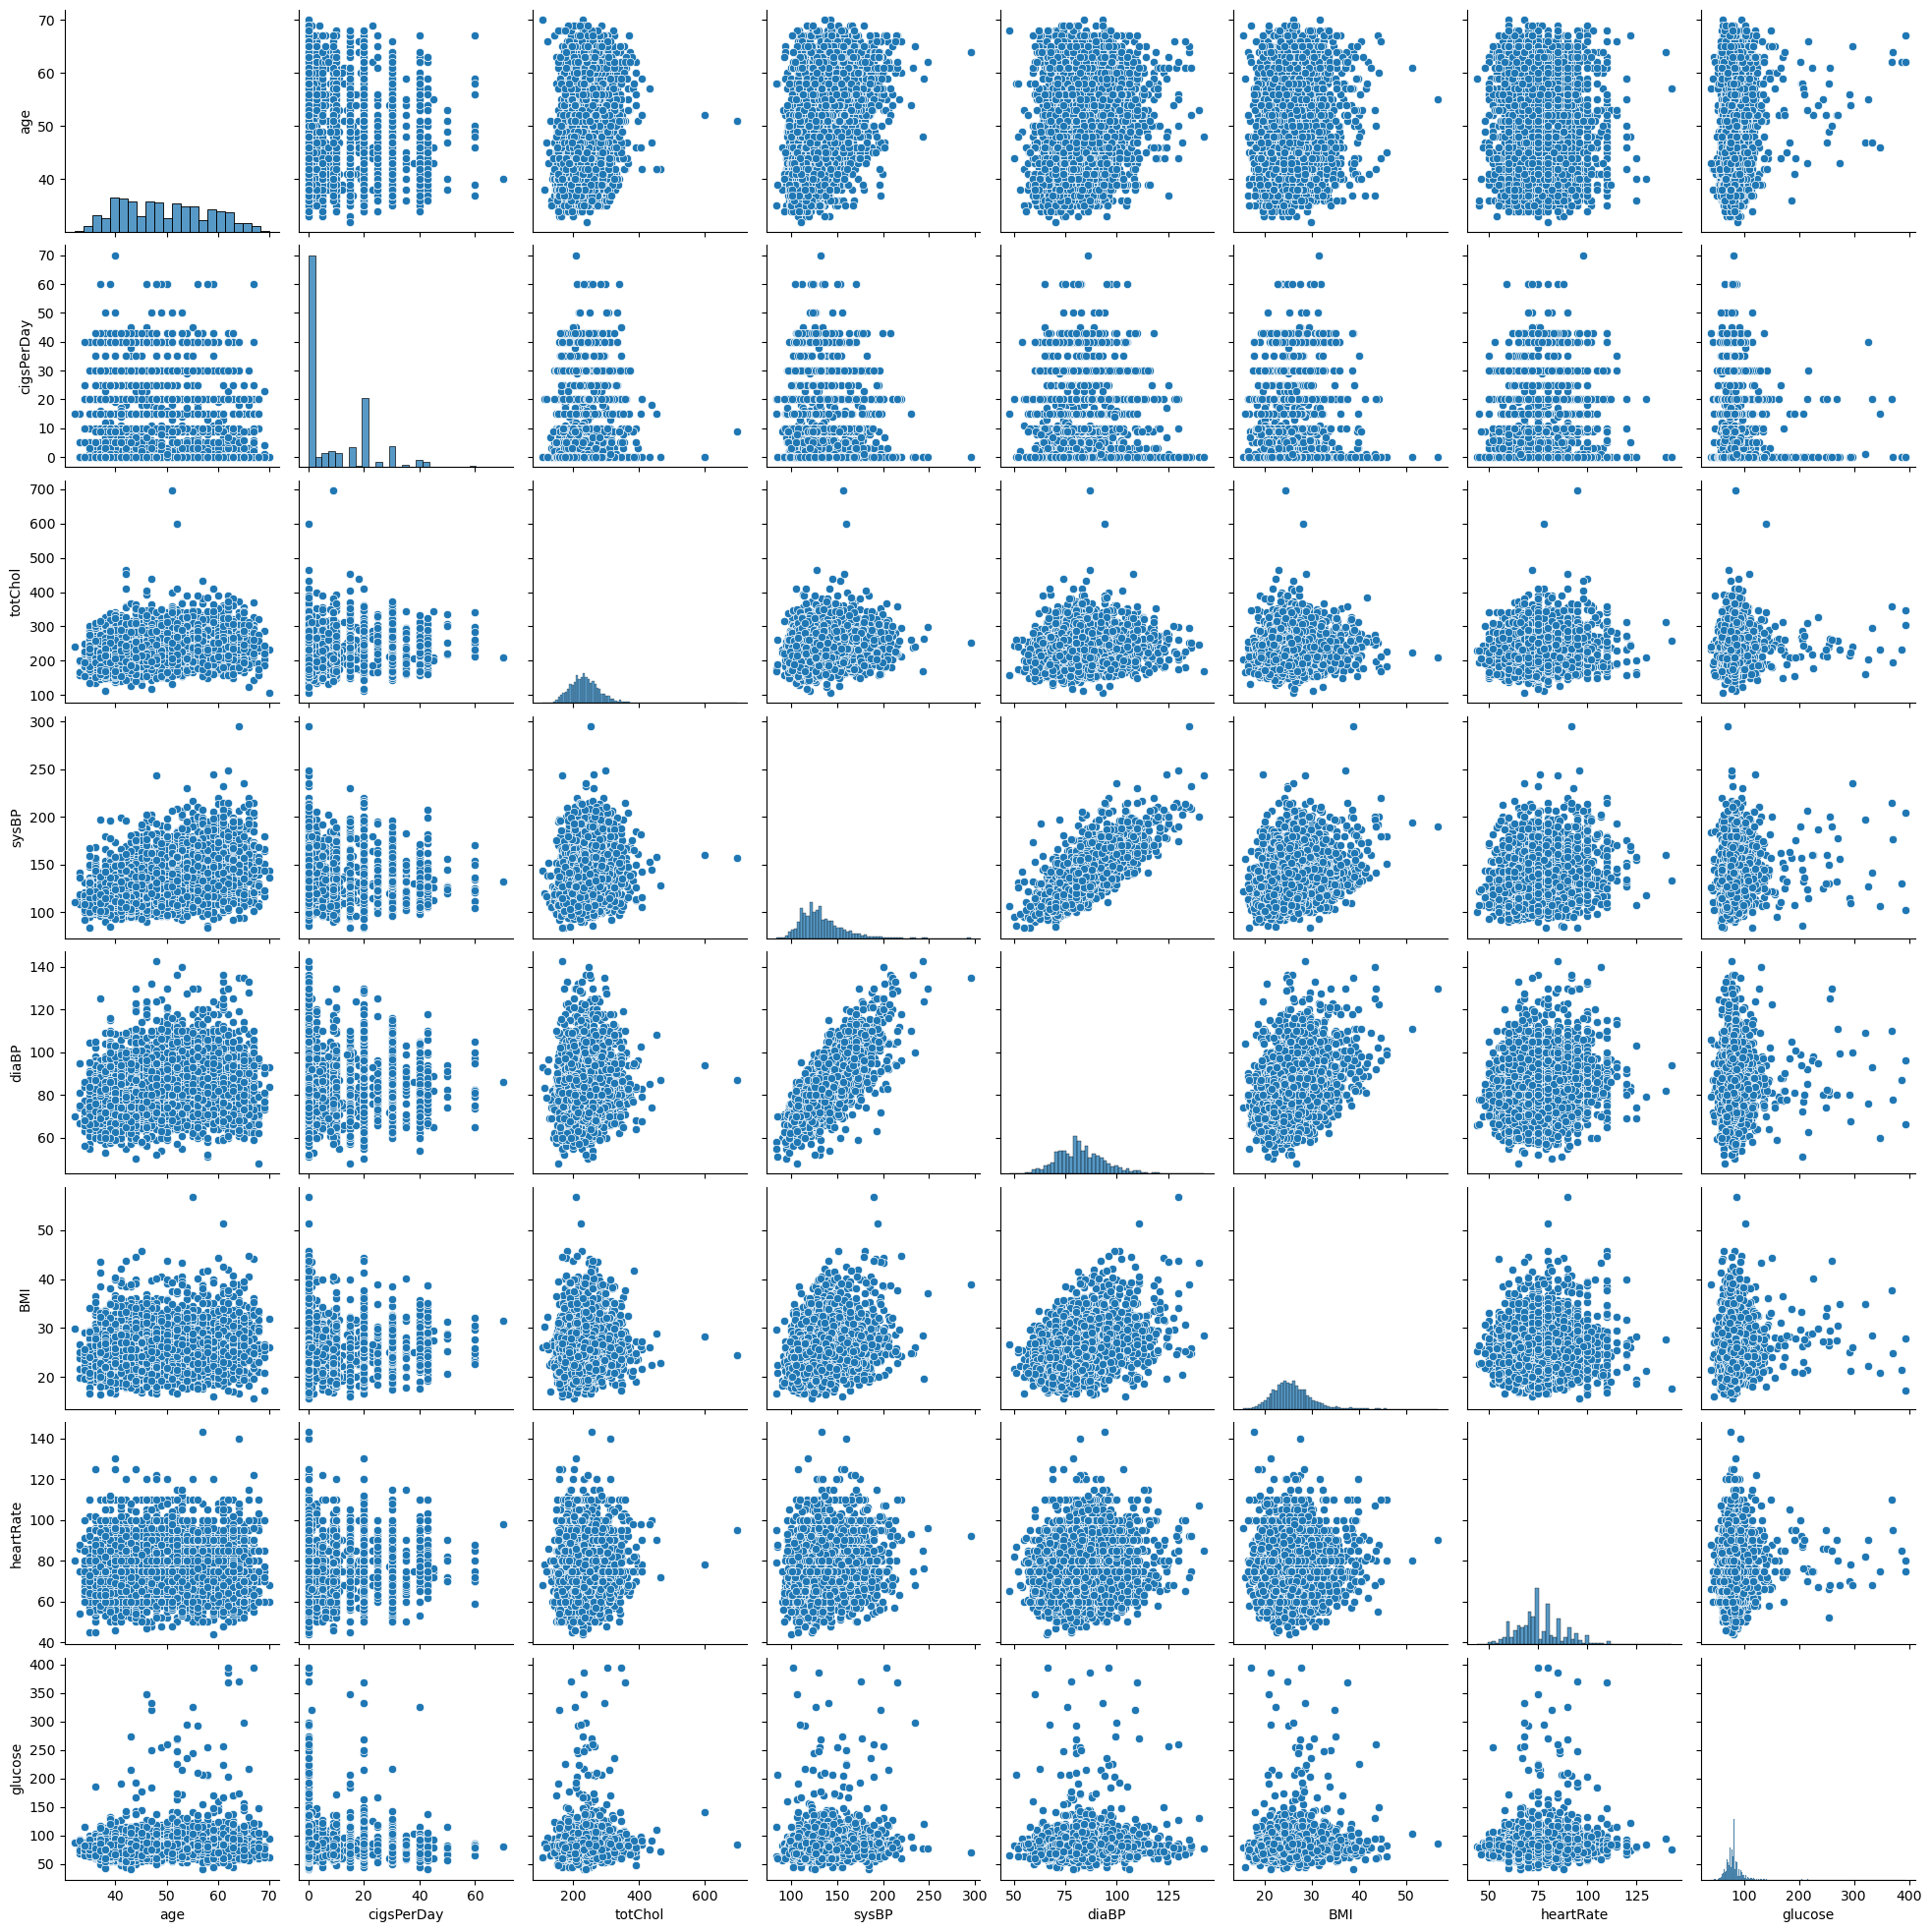

In [90]:
# Creating a pairwise scatter plot of selected columns in the DataFrame
sns.pairplot(ds[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]);

In [91]:
# Splitting the DataFrame into predictor variables and target variable

X = ds.drop('TenYearCHD',axis=1)

# Load the target variable to y

y=ds['TenYearCHD']

In [92]:
# Train/Test splitting of data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [93]:
# Initializing Logistic Regression Model
Classifier = LogisticRegression()

# Train the Logistic Regression Model
Classifier.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
# Predicting the target variable using the trained model and the test data
y_test_hat = Classifier.predict(X_test)

# Creating a DataFrame to store the actual and predicted values of the target variable
Results = pd.DataFrame({'Actual': y_test, 'Predictions': y_test_hat})

# Displaying the first 5 rows of the Results DataFrame
Results.head(5)

,Actual,Predictions
906,0,0
857,0,0
2761,0,0
108,1,0
2894,0,0


In [95]:
# Importing the accuracy_score function from the scikit-learn library
from sklearn.metrics import accuracy_score

# Calculating the accuracy score of the predicted values
print(accuracy_score(y_test,y_test_hat))

0.8718553459119497


In [96]:
# Predicting the target variable for the training data
y_train_hat = Classifier.predict(X_train)

In [97]:
# Calculating the accuracy score of the predicted values for the training data
print(accuracy_score(y_train, y_train_hat))

0.8415374241402562


In [98]:
y_test_hat_proba = Classifier.predict_proba(X_test)
y_test_hat_proba

array([[0.82529915, 0.17470085],
       [0.93101954, 0.06898046],
       [0.89820776, 0.10179224],
       ...,
       [0.75909719, 0.24090281],
       [0.77745288, 0.22254712],
       [0.91425079, 0.08574921]])

In [99]:
# Import the confusion_matrix function from sklearn.metrics module
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the test set and output it to the console.
cm = confusion_matrix(y_test,y_test_hat)
print(cm)

[[1097    9]
 [ 154   12]]


Text(95.72222222222221, 0.5, 'True Label')

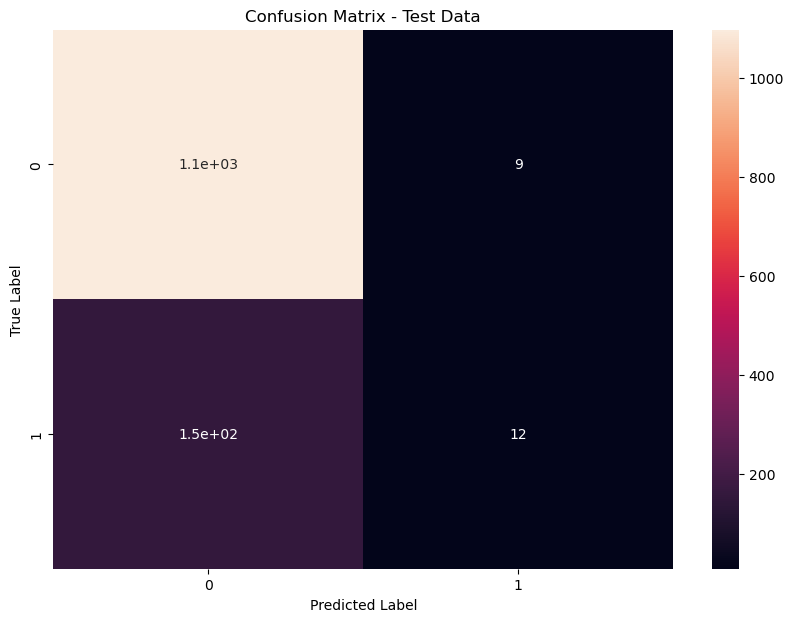

In [100]:
# Importing the seaborn library for visualization
import seaborn as sn

# Creating a heatmap using the confusion matrix with annotations
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)

# Setting the title, x-label and y-label of the heatmap
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

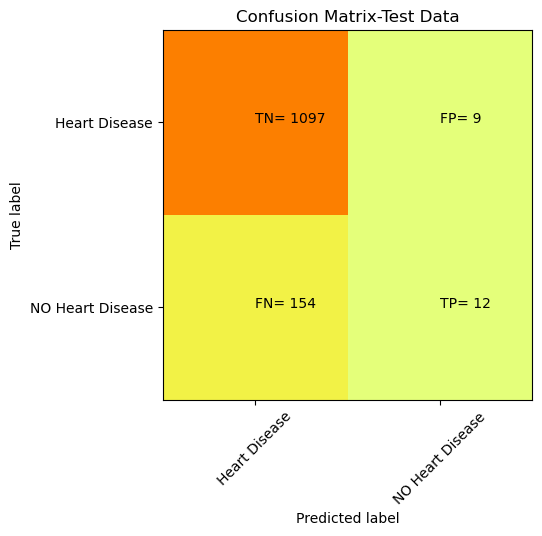

In [101]:
# Displaying an image of the confusion matrix with the Wistia color map
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)

# Creating a list of class names and setting the title, x-label and y-label of the plot
classNames = ['Heart Disease', 'NO Heart Disease']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Setting the ticks and labels for the x and y axes
tick_marks = np.arange(2)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Adding the values of True Negatives, False Positives, False Negatives and True Positives to the plot
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+"= "+str(cm[i][j]))

# Displaying the plot
plt.show()

In [102]:
# Import the classification_report function from sklearn.metrics module
from sklearn.metrics import classification_report

# Call the classification_report function with y_test and y_test_hat as arguments and print the report, which includes metrics such as precision, recall, F1-score, and support for each class in the classification model


print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1106
           1       0.57      0.07      0.13       166

    accuracy                           0.87      1272
   macro avg       0.72      0.53      0.53      1272
weighted avg       0.84      0.87      0.83      1272



In [103]:
# Calculate metrics values individually
# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [104]:
# Calculating precision, recall, specificity, and accuracy mathematically by using their equations 
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.07228915662650602


In [105]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.5714285714285714


In [106]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.9918625678119349


In [107]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.8718553459119497
